# Komal Kumari


# Project Name: Prediction for Credit Card Approval

# Problem Statement:

# Your Mission:

In [9]:
#IMPORT LIABRARIES

In [10]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier


In [4]:
df = pd.read_csv('train_data.csv')
df

,ID,Gender,Has a car,Has a property,Children count,Income,Employment status,Education level,Marital status,Dwelling,Age,Employment length,Has a mobile phone,Has a work phone,Has a phone,Has an email,Job title,Family member count,Account age,Is high risk
0,5037048,M,Y,Y,0,135000.0,Working,Secondary / secondary special,Married,With parents,-16271,-3111,1,0,0,0,Core staff,2.0,-17.0,0
1,5044630,F,Y,N,1,135000.0,Commercial associate,Higher education,Single / not married,House / apartment,-10130,-1651,1,0,0,0,Accountants,2.0,-1.0,0
2,5079079,F,N,Y,2,180000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-12821,-5657,1,0,0,0,Laborers,4.0,-38.0,0
3,5112872,F,Y,Y,0,360000.0,Commercial associate,Higher education,Single / not married,House / apartment,-20929,-2046,1,0,0,1,Managers,1.0,-11.0,0
4,5105858,F,N,N,0,270000.0,Working,Secondary / secondary special,Separated,House / apartment,-16207,-515,1,0,1,0,NaN,1.0,-41.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29160,5067139,F,N,Y,0,112500.0,Pensioner,Secondary / secondary special,Single / not married,House / apartment,-23400,365243,1,0,1,1,NaN,1.0,-5.0,0
29161,5029193,F,N,Y,1,135000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15532,-8256,1,0,0,0,Core staff,3.0,-24.0,0
29162,5047710,F,N,Y,0,76500.0,Working,Secondary / secondary special,Married,House / apartment,-17782,-3291,1,1,1,0,Managers,2.0,-29.0,0
29163,5009886,F,N,Y,0,157500.0,Pensioner,Secondary / secondary special,Civil marriage,House / apartment,-21635,365243,1,0,1,0,NaN,2.0,-37.0,0


In [11]:
df.head()

,ID,Gender,Has a car,Has a property,Children count,Income,Employment status,Education level,Marital status,Dwelling,Age,Employment length,Has a mobile phone,Has a work phone,Has a phone,Has an email,Job title,Family member count,Account age,Is high risk
0,5037048,M,Y,Y,0,135000.0,Working,Secondary / secondary special,Married,With parents,-16271,-3111,1,0,0,0,Core staff,2.0,-17.0,0
1,5044630,F,Y,N,1,135000.0,Commercial associate,Higher education,Single / not married,House / apartment,-10130,-1651,1,0,0,0,Accountants,2.0,-1.0,0
2,5079079,F,N,Y,2,180000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-12821,-5657,1,0,0,0,Laborers,4.0,-38.0,0
3,5112872,F,Y,Y,0,360000.0,Commercial associate,Higher education,Single / not married,House / apartment,-20929,-2046,1,0,0,1,Managers,1.0,-11.0,0
4,5105858,F,N,N,0,270000.0,Working,Secondary / secondary special,Separated,House / apartment,-16207,-515,1,0,1,0,NaN,1.0,-41.0,0


In [13]:
df.shape

(29165, 20)

In [14]:
df.tail()

,ID,Gender,Has a car,Has a property,Children count,Income,Employment status,Education level,Marital status,Dwelling,Age,Employment length,Has a mobile phone,Has a work phone,Has a phone,Has an email,Job title,Family member count,Account age,Is high risk
29160,5067139,F,N,Y,0,112500.0,Pensioner,Secondary / secondary special,Single / not married,House / apartment,-23400,365243,1,0,1,1,NaN,1.0,-5.0,0
29161,5029193,F,N,Y,1,135000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15532,-8256,1,0,0,0,Core staff,3.0,-24.0,0
29162,5047710,F,N,Y,0,76500.0,Working,Secondary / secondary special,Married,House / apartment,-17782,-3291,1,1,1,0,Managers,2.0,-29.0,0
29163,5009886,F,N,Y,0,157500.0,Pensioner,Secondary / secondary special,Civil marriage,House / apartment,-21635,365243,1,0,1,0,NaN,2.0,-37.0,0
29164,5062632,F,N,Y,0,585000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-18858,-2010,1,0,1,0,NaN,2.0,-43.0,0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29165 entries, 0 to 29164
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   29165 non-null  int64  
 1   Gender               29165 non-null  object 
 2   Has a car            29165 non-null  object 
 3   Has a property       29165 non-null  object 
 4   Children count       29165 non-null  int64  
 5   Income               29165 non-null  float64
 6   Employment status    29165 non-null  object 
 7   Education level      29165 non-null  object 
 8   Marital status       29165 non-null  object 
 9   Dwelling             29165 non-null  object 
 10  Age                  29165 non-null  int64  
 11  Employment length    29165 non-null  int64  
 12  Has a mobile phone   29165 non-null  int64  
 13  Has a work phone     29165 non-null  int64  
 14  Has a phone          29165 non-null  int64  
 15  Has an email         29165 non-null 

In [17]:
#insight 
# ID,Children count, Income, Age, Employment length,Has a mobile phone,Has a phone,Has an email,Family member count,Account age, Is high risk
# other object

In [18]:
#***Exploratory Data Analysis (EDA)

In [19]:
df.describe()

,ID,Children count,Income,Age,Employment length,Has a mobile phone,Has a work phone,Has a phone,Has an email,Family member count,Account age,Is high risk
count,2.916500e+04,29165.000000,2.916500e+04,29165.000000,29165.000000,29165.0,29165.000000,29165.000000,29165.000000,29165.000000,29165.000000,29165.000000
mean,5.078232e+06,0.430790,1.868904e+05,-15979.477490,59257.761255,1.0,0.224310,0.294977,0.090279,2.197531,-26.137734,0.017110
std,4.182400e+04,0.741882,1.014096e+05,4202.997485,137655.883458,0.0,0.417134,0.456040,0.286587,0.912189,16.486702,0.129682
min,5.008804e+06,0.000000,2.700000e+04,-25152.000000,-15713.000000,1.0,0.000000,0.000000,0.000000,1.000000,-60.000000,0.000000
25%,5.042047e+06,0.000000,1.215000e+05,-19444.000000,-3153.000000,1.0,0.000000,0.000000,0.000000,2.000000,-39.000000,0.000000
50%,5.074666e+06,0.000000,1.575000e+05,-15565.000000,-1557.000000,1.0,0.000000,0.000000,0.000000,2.000000,-24.000000,0.000000
75%,5.114629e+06,1.000000,2.250000e+05,-12475.000000,-412.000000,1.0,0.000000,1.000000,0.000000,3.000000,-12.000000,0.000000
max,5.150485e+06,19.000000,1.575000e+06,-7705.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000,0.000000,1.000000


In [20]:
# Checking for missing values
print(df.isnull().sum())

ID                        0
Gender                    0
Has a car                 0
Has a property            0
Children count            0
Income                    0
Employment status         0
Education level           0
Marital status            0
Dwelling                  0
Age                       0
Employment length         0
Has a mobile phone        0
Has a work phone          0
Has a phone               0
Has an email              0
Job title              9027
Family member count       0
Account age               0
Is high risk              0
dtype: int64


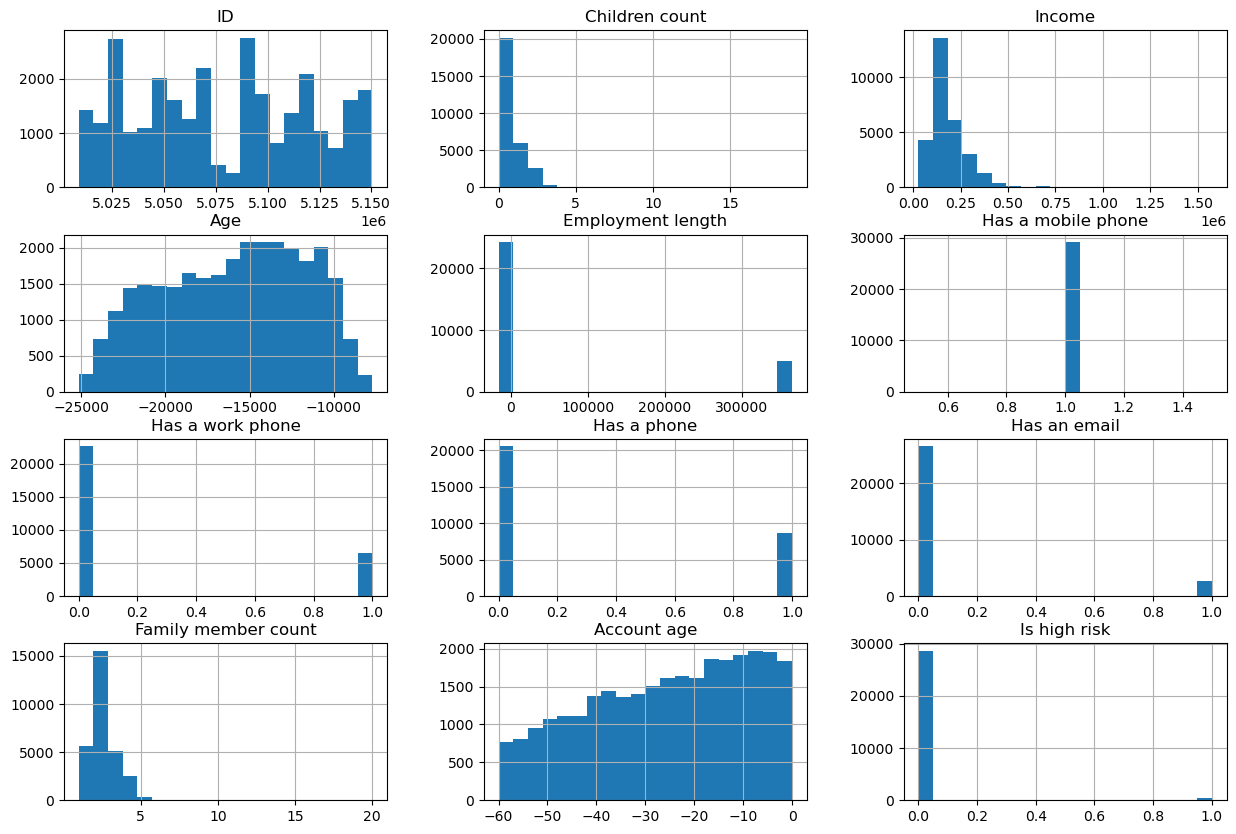

In [21]:
# Visualize the distribution of numerical features
df.hist(bins=20, figsize=(15,10))
plt.show()

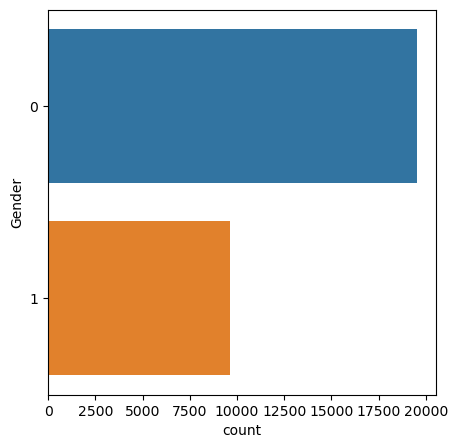

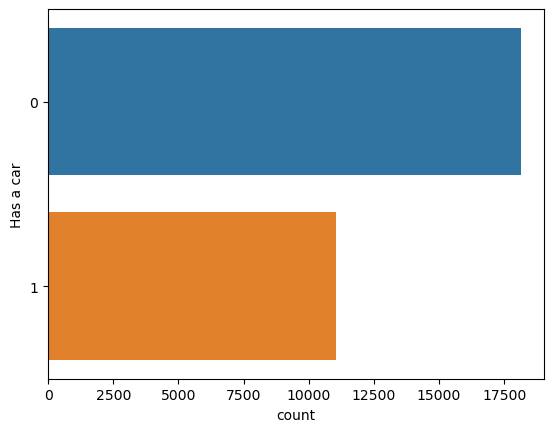

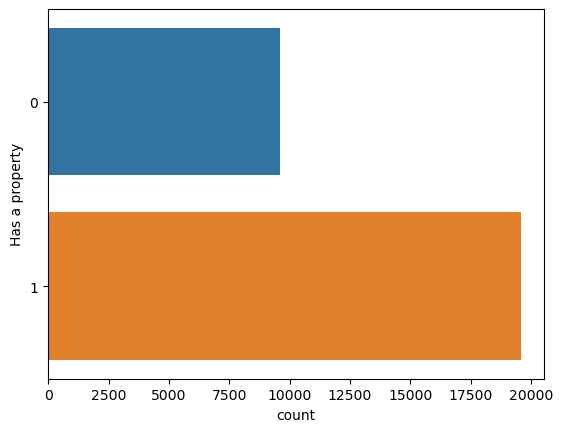

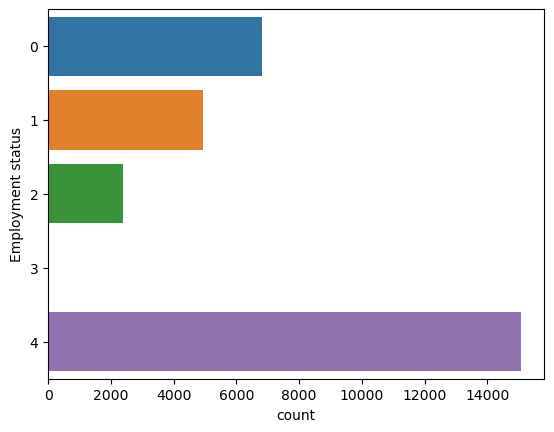

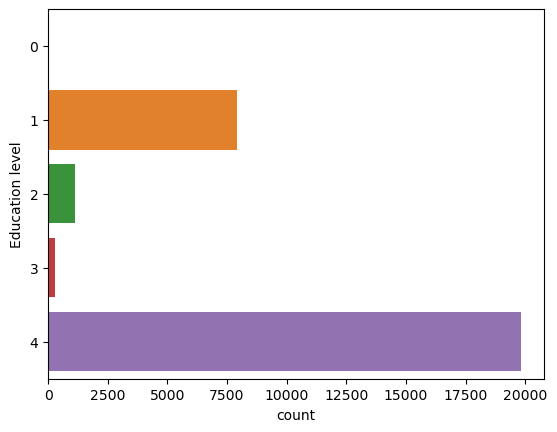

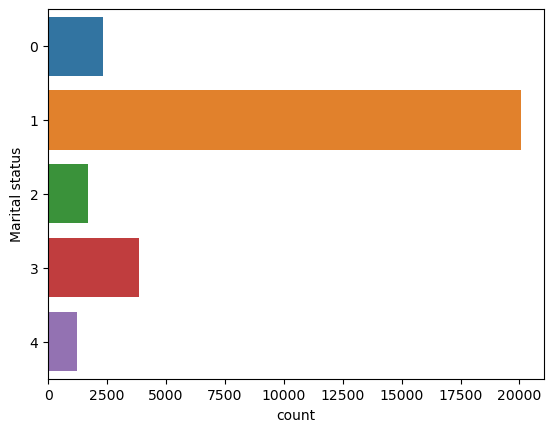

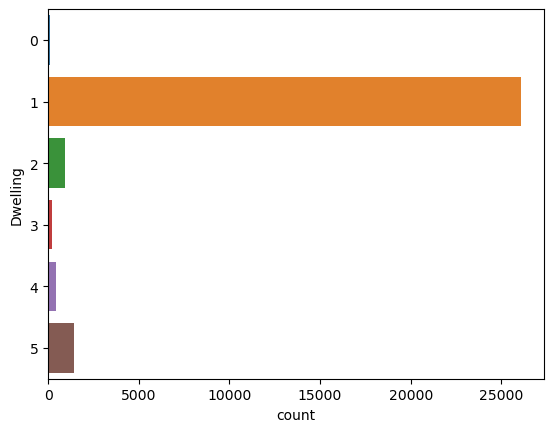

In [68]:
# Count plot for categorical features
plt.figure(figsize =(5,5))
for col in ['Gender', 'Has a car', 'Has a property', 'Employment status', 'Education level', 'Marital status', 'Dwelling']:
    sns.countplot(y=col, data=df)
    plt.show()

# 4. Feature Engineering


In [23]:
# Creating interaction terms (example)
df['Income_per_family_member'] = df['Income'] / (df['Family member count'] + 1)  # Avoid division by zero

# Creating binary features (example)
df['Is_Employed'] = df['Employment status'].apply(lambda x: 1 if x != 'Unemployed' else 0)

# 5. Data Preprocessing

In [81]:
df.isnull().sum()

ID                             0
Gender                         0
Has a car                      0
Has a property                 0
Children count                 0
Income                         0
Employment status              0
Education level                0
Marital status                 0
Dwelling                       0
Age                            0
Employment length              0
Has a mobile phone             0
Has a work phone               0
Has a phone                    0
Has an email                   0
Job title                   9027
Family member count            0
Account age                    0
Is high risk                   0
Income_per_family_member       0
Is_Employed                    0
dtype: int64

In [27]:
duplicates = df['Job title'].duplicated(keep=False)
print(df[duplicates])  # Print rows where 'Job title' is duplicated

            ID Gender Has a car Has a property  Children count    Income  \
0      5037048      M         Y              Y               0  135000.0   
1      5044630      F         Y              N               1  135000.0   
2      5079079      F         N              Y               2  180000.0   
3      5112872      F         Y              Y               0  360000.0   
4      5105858      F         N              N               0  270000.0   
...        ...    ...       ...            ...             ...       ...   
29160  5067139      F         N              Y               0  112500.0   
29161  5029193      F         N              Y               1  135000.0   
29162  5047710      F         N              Y               0   76500.0   
29163  5009886      F         N              Y               0  157500.0   
29164  5062632      F         N              Y               0  585000.0   

          Employment status                Education level  \
0                   Worki

In [28]:
mode_job_title = df['Job title'].mode()[0] 

In [29]:
df.loc[duplicates, 'Job title'] = mode_job_title


In [30]:
df.isnull().sum()

ID                          0
Gender                      0
Has a car                   0
Has a property              0
Children count              0
Income                      0
Employment status           0
Education level             0
Marital status              0
Dwelling                    0
Age                         0
Employment length           0
Has a mobile phone          0
Has a work phone            0
Has a phone                 0
Has an email                0
Job title                   0
Family member count         0
Account age                 0
Is high risk                0
Income_per_family_member    0
Is_Employed                 0
dtype: int64

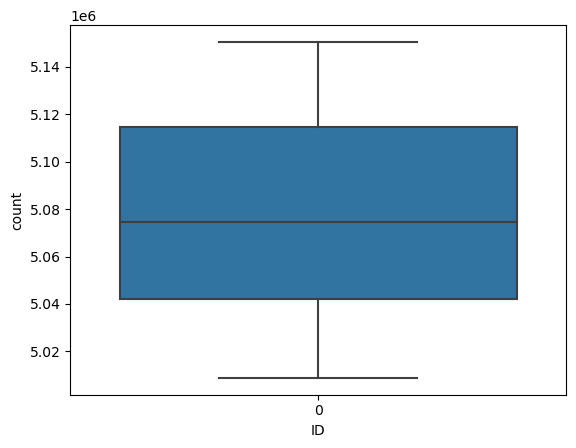

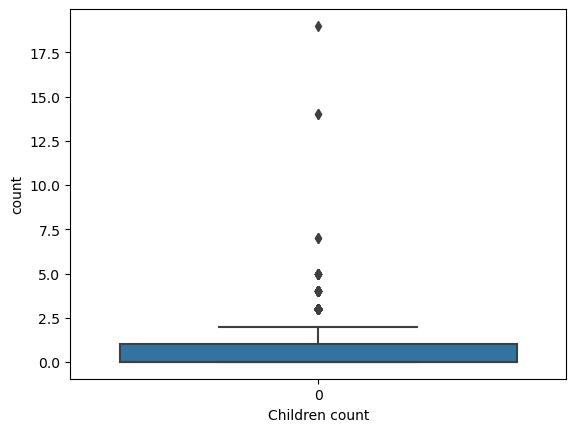

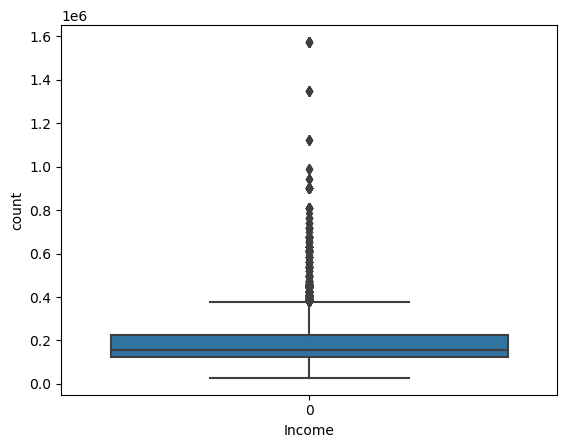

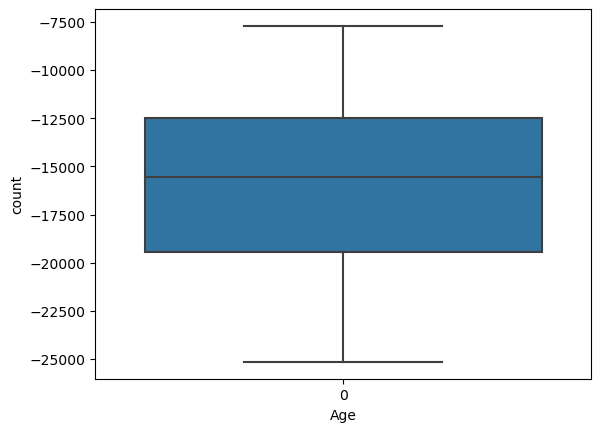

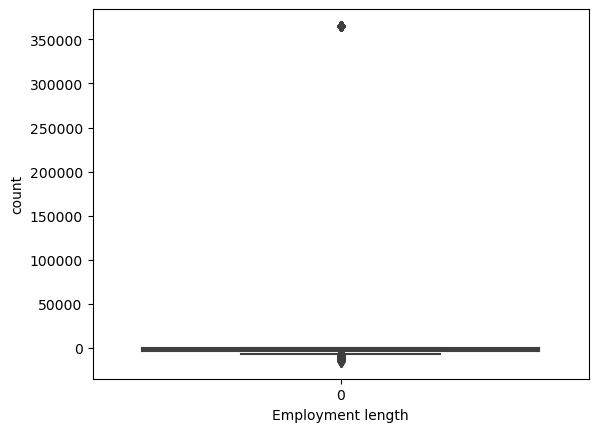

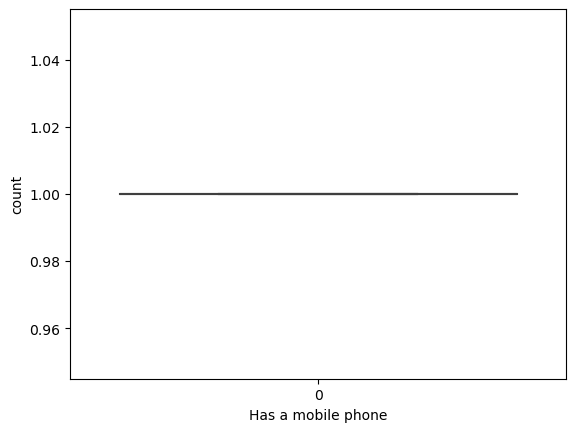

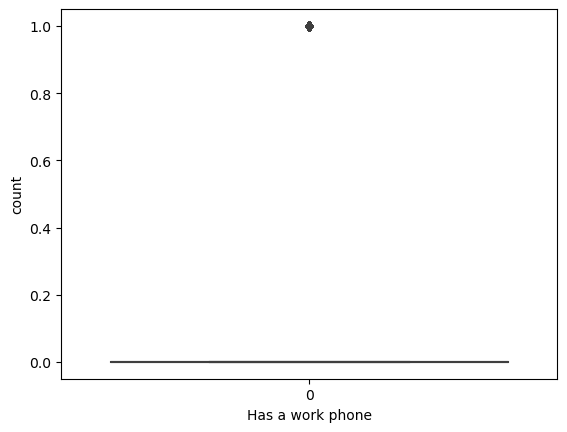

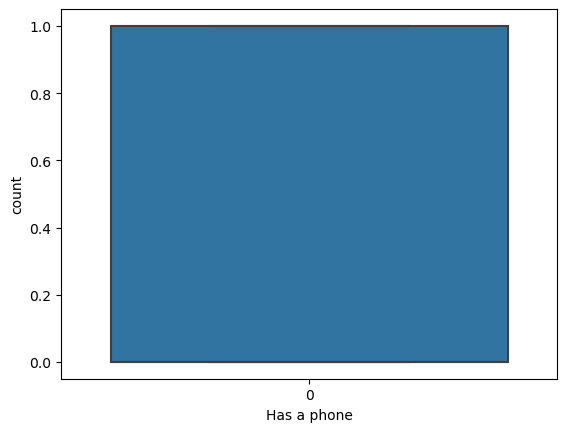

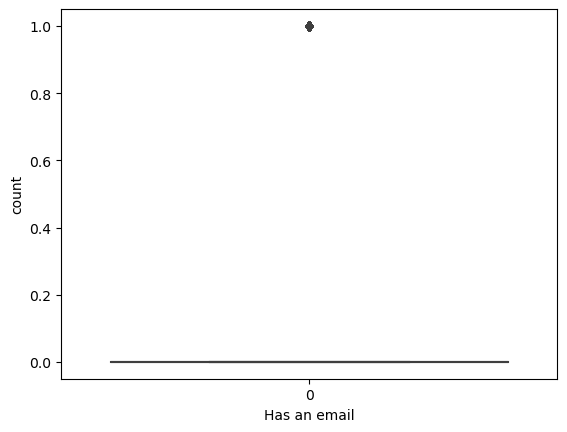

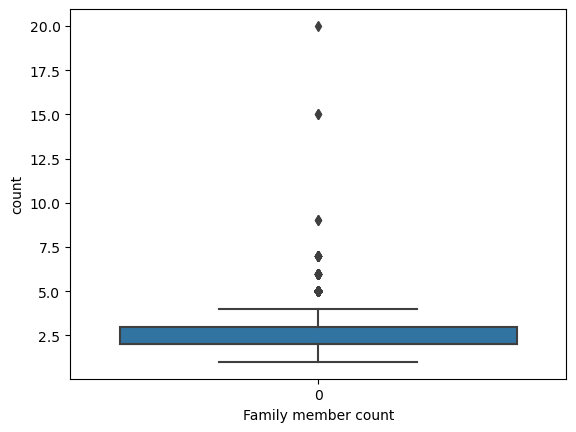

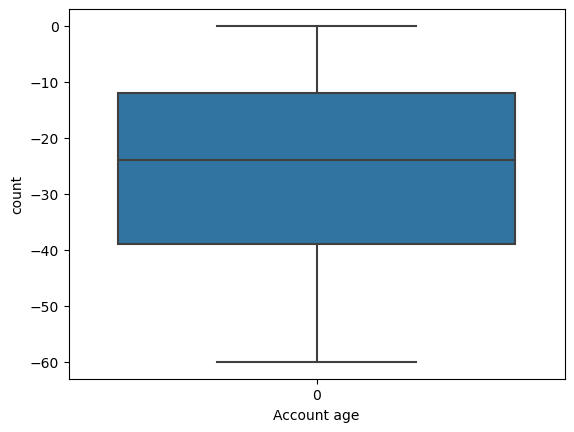

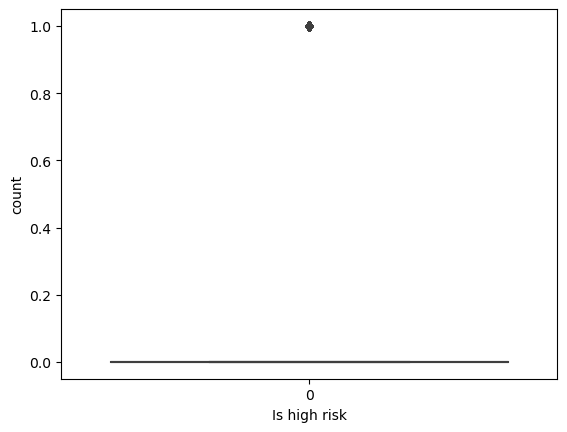

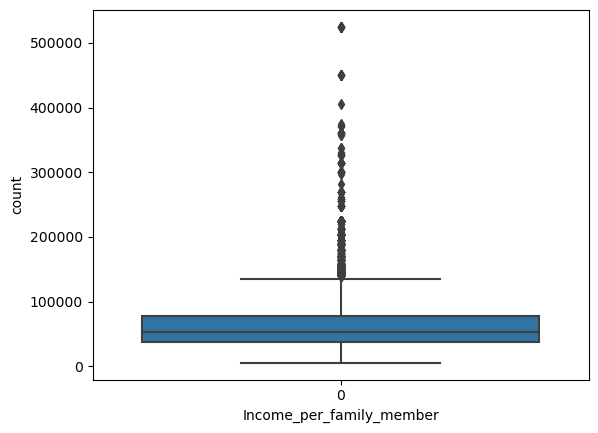

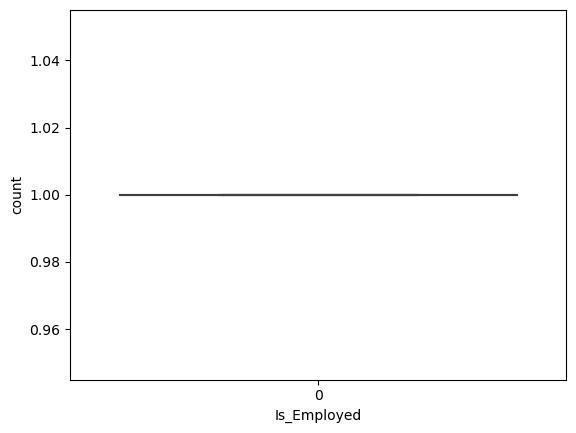

In [37]:
# Grabbing all the columns from the dataset
col_list = df.columns

# we need only the numerical data
for x in col_list:
  if df[x].dtype != "object":
    sns.boxplot(df[x])
    plt.xlabel(x)
    plt.ylabel("count")
    plt.show()

In [38]:
# Label Encoding for categorical variables
# Label Encoding for categorical variables
from sklearn.preprocessing import LabelEncoder

# List of columns to be label encoded
label_encode_cols = ['Gender', 'Has a car', 'Has a property', 'Employment status', 
                     'Education level', 'Marital status', 'Dwelling', 'Job title']

label_encoders = {}  # Dictionary to store label encoders for each column

for col in label_encode_cols:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])

df.head()  # Check the first few rows to ensure the encoding worked



,ID,Gender,Has a car,Has a property,Children count,Income,Employment status,Education level,Marital status,Dwelling,...,Has a mobile phone,Has a work phone,Has a phone,Has an email,Job title,Family member count,Account age,Is high risk,Income_per_family_member,Is_Employed
0,5037048,1,1,1,0,135000.0,4,4,1,5,...,1,0,0,0,0,2.0,-17.0,0,45000.0,1
1,5044630,0,1,0,1,135000.0,0,1,3,1,...,1,0,0,0,0,2.0,-1.0,0,45000.0,1
2,5079079,0,0,1,2,180000.0,0,4,1,1,...,1,0,0,0,0,4.0,-38.0,0,36000.0,1
3,5112872,0,1,1,0,360000.0,0,1,3,1,...,1,0,0,1,0,1.0,-11.0,0,180000.0,1
4,5105858,0,0,0,0,270000.0,4,4,2,1,...,1,0,1,0,0,1.0,-41.0,0,135000.0,1


In [39]:
# Ensure binary columns are integers (0 and 1)
binary_cols = ['Has a mobile phone', 'Has a work phone', 'Has a phone', 'Has an email']

for col in binary_cols:
    df[col] = df[col].astype(int)



# 6. Split the Dataset

In [40]:
# Split the dataset into features and target variable
X = df.drop(['ID', 'Is high risk'], axis=1)  # Drop target variable and any ID columns
y = df['Is high risk']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# 7. Train Machine Learning Models

In [41]:
# Initialize models
log_reg = LogisticRegression()
dec_tree = DecisionTreeClassifier()
rand_forest = RandomForestClassifier()
grad_boost = GradientBoostingClassifier()

In [42]:
# Train the models
log_reg.fit(X_train, y_train)
dec_tree.fit(X_train, y_train)
rand_forest.fit(X_train, y_train)
grad_boost.fit(X_train, y_train)

GradientBoostingClassifier()

In [43]:
# Function to evaluate models
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred):.2f}")
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
    plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc_score(y_test, y_pred):.2f})')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()



Logistic Regression
Accuracy: 0.98
Confusion Matrix:
[[8614    0]
 [ 136    0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      8614
           1       0.00      0.00      0.00       136

    accuracy                           0.98      8750
   macro avg       0.49      0.50      0.50      8750
weighted avg       0.97      0.98      0.98      8750

ROC AUC Score: 0.50


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


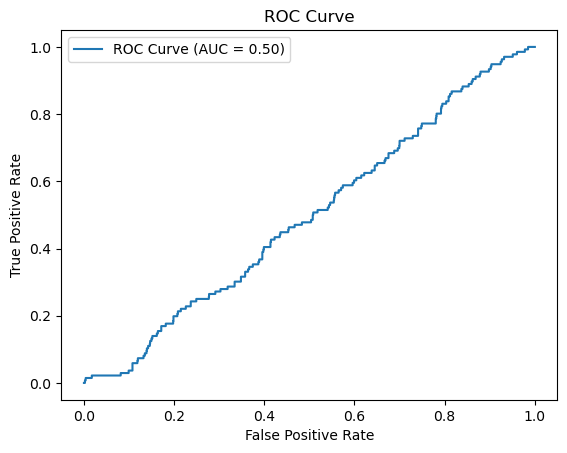

In [44]:
# Evaluate each model
print("Logistic Regression")
evaluate_model(log_reg, X_test, y_test)



Decision Tree
Accuracy: 0.97
Confusion Matrix:
[[8480  134]
 [ 113   23]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      8614
           1       0.15      0.17      0.16       136

    accuracy                           0.97      8750
   macro avg       0.57      0.58      0.57      8750
weighted avg       0.97      0.97      0.97      8750

ROC AUC Score: 0.58


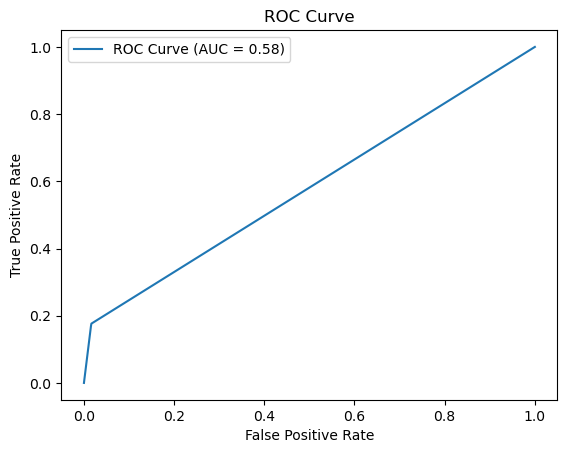

In [45]:

print("Decision Tree")
evaluate_model(dec_tree, X_test, y_test)



Random Forest
Accuracy: 0.98
Confusion Matrix:
[[8587   27]
 [ 118   18]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      8614
           1       0.40      0.13      0.20       136

    accuracy                           0.98      8750
   macro avg       0.69      0.56      0.60      8750
weighted avg       0.98      0.98      0.98      8750

ROC AUC Score: 0.56


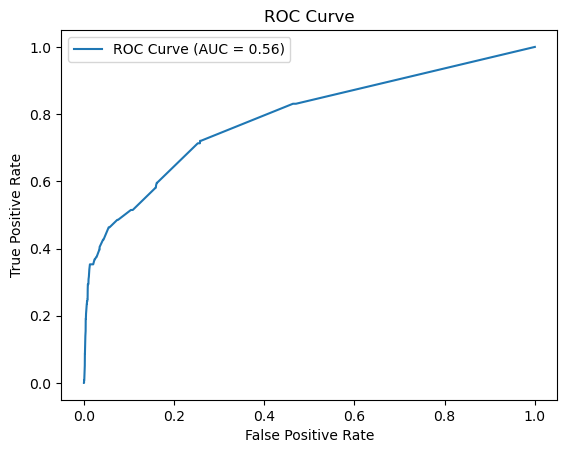

In [95]:
print("Random Forest")
evaluate_model(rand_forest, X_test, y_test)



Gradient Boosting
Accuracy: 0.98
Confusion Matrix:
[[8604   10]
 [ 132    4]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      8614
           1       0.29      0.03      0.05       136

    accuracy                           0.98      8750
   macro avg       0.64      0.51      0.52      8750
weighted avg       0.97      0.98      0.98      8750

ROC AUC Score: 0.51


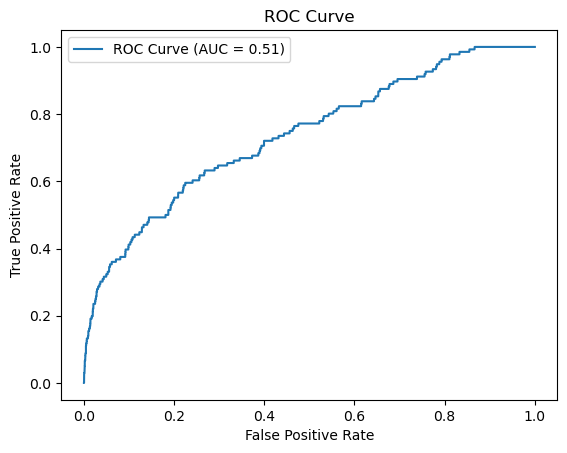

In [96]:
print("Gradient Boosting")
evaluate_model(grad_boost, X_test, y_test)

# 9. Predicting Credit Card Approval


In [47]:
# Example prediction
best_model = grad_boost  # Assume Gradient Boosting is the best model
y_pred_test = best_model.predict(X_test)


# 10. Generate Recommendations

In [48]:
# Analyze feature importance (for tree-based models)
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': grad_boost.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(feature_importances)

# Recommendations might be derived from the analysis above


                     Feature  Importance
9                        Age    0.321159
10         Employment length    0.149045
17               Account age    0.144903
3             Children count    0.119142
18  Income_per_family_member    0.052008
4                     Income    0.050382
16       Family member count    0.042764
7             Marital status    0.040562
8                   Dwelling    0.028164
0                     Gender    0.013350
2             Has a property    0.011487
6            Education level    0.010444
5          Employment status    0.006576
12          Has a work phone    0.004422
1                  Has a car    0.003786
13               Has a phone    0.001261
14              Has an email    0.000546
11        Has a mobile phone    0.000000
15                 Job title    0.000000
19               Is_Employed    0.000000


# load test dataset

In [49]:
# Load the new test dataset
test_df = pd.read_csv('test_data.csv')  # Replace with your file path
test_df

,ID,Gender,Has a car,Has a property,Children count,Income,Employment status,Education level,Marital status,Dwelling,Age,Employment length,Has a mobile phone,Has a work phone,Has a phone,Has an email,Job title,Family member count,Account age,Is high risk
0,5091261,F,N,Y,0,202500.0,State servant,Secondary / secondary special,Separated,House / apartment,-16834,-1692,1,0,0,0,Medicine staff,1.0,-6.0,0
1,5096963,M,Y,N,0,675000.0,Commercial associate,Higher education,Married,House / apartment,-18126,-948,1,0,1,0,Managers,2.0,-16.0,0
2,5087880,F,N,N,0,234000.0,State servant,Higher education,Civil marriage,House / apartment,-21967,-5215,1,0,0,1,Core staff,2.0,-52.0,0
3,5021949,F,Y,Y,0,445500.0,Commercial associate,Higher education,Married,House / apartment,-12477,-456,1,0,0,0,Managers,2.0,-54.0,0
4,5105705,F,Y,N,0,225000.0,Working,Secondary / secondary special,Married,Municipal apartment,-12155,-667,1,0,0,0,Laborers,2.0,-48.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7287,5115415,F,Y,Y,0,135000.0,Working,Secondary / secondary special,Married,House / apartment,-21724,-1351,1,0,0,0,NaN,2.0,-22.0,0
7288,5068826,F,Y,Y,0,157500.0,Working,Higher education,Married,House / apartment,-14976,-3550,1,0,0,1,Drivers,2.0,-42.0,0
7289,5026088,F,N,Y,0,67500.0,Working,Secondary / secondary special,Widow,House / apartment,-20482,-5030,1,1,1,0,NaN,1.0,-25.0,0
7290,5142701,F,Y,N,0,95850.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-18931,-6678,1,1,0,0,Laborers,2.0,-49.0,0


In [51]:
# Handle missing values (example: filling with median for numerical columns)
test_df['Income'] = test_df['Income'].fillna(test_df['Income'].median())



In [52]:


# Apply label encoding using the same encoders as training data
for col in label_encode_cols:
    # Ensure all unseen labels are handled appropriately (e.g., set to a default or most common value)
    test_df[col] = test_df[col].map(lambda x: label_encoders[col].transform([x])[0] if x in label_encoders[col].classes_ else -1)

# Note: Ensure that handling of -1 or unknown categories is appropriately managed in the model.

# Ensure binary columns are integers (0 and 1)
for col in binary_cols:
    test_df[col] = test_df[col].astype(int)



In [53]:
from sklearn.preprocessing import StandardScaler

# Initialize and fit the scaler on the training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[['Income', 'Age', 'Employment length', 'Account age', 'Income_per_family_member']])

In [55]:
# Apply any additional feature engineering steps consistent with training data
test_df['Income_per_family_member'] = test_df['Income'] / (test_df['Family member count'] + 1)
test_df['Is_Employed'] = test_df['Employment status'].apply(lambda x: 1 if x != 'Unemployed' else 0)




In [57]:
# Ensure test dataset only contains the features used in training
X_test_new = test_df[X.columns]


In [59]:
# Display the processed test data
X_test_new.head()

,Gender,Has a car,Has a property,Children count,Income,Employment status,Education level,Marital status,Dwelling,Age,Employment length,Has a mobile phone,Has a work phone,Has a phone,Has an email,Job title,Family member count,Account age,Income_per_family_member,Is_Employed
0,0,0,1,0,202500.0,2,4,2,1,-16834,-1692,1,0,0,0,-1,1.0,-6.0,101250.0,1
1,1,1,0,0,675000.0,0,1,1,1,-18126,-948,1,0,1,0,-1,2.0,-16.0,225000.0,1
2,0,0,0,0,234000.0,2,1,0,1,-21967,-5215,1,0,0,1,-1,2.0,-52.0,78000.0,1
3,0,1,1,0,445500.0,0,1,1,1,-12477,-456,1,0,0,0,-1,2.0,-54.0,148500.0,1
4,0,1,0,0,225000.0,4,4,1,2,-12155,-667,1,0,0,0,0,2.0,-48.0,75000.0,1


# Making Predictions

In [60]:
# Make predictions on the new test dataset
y_test_pred = best_model.predict(X_test_new)
y_test_pred_proba = best_model.predict_proba(X_test_new)[:, 1]  # Probabilities for class 1

# Add predictions to the test dataframe
test_df['Predicted High Risk'] = y_test_pred
test_df['Prediction Probability'] = y_test_pred_proba

# Output the predictions
test_df[['ID', 'Predicted High Risk', 'Prediction Probability']].head()


,ID,Predicted High Risk,Prediction Probability
0,5091261,0,0.005710
1,5096963,0,0.019174
2,5087880,0,0.006192
3,5021949,0,0.015523
4,5105705,0,0.039482


# Analyzing Feature Importance

In [61]:
# Describe the prediction probabilities to get a sense of their distribution
test_df['Prediction Probability'].describe()

# Show a few example predictions
print(test_df[['ID', 'Predicted High Risk', 'Prediction Probability']].head(10))

# Optional: Save the predictions to an Excel file
test_df.to_excel('predicted_credit_card_approvals.xlsx', index=False)  # Save to Excel


        ID  Predicted High Risk  Prediction Probability
0  5091261                    0                0.005710
1  5096963                    0                0.019174
2  5087880                    0                0.006192
3  5021949                    0                0.015523
4  5105705                    0                0.039482
5  5029195                    0                0.015119
6  5029213                    0                0.010491
7  5051050                    0                0.007581
8  5061569                    0                0.033867
9  5091430                    0                0.017197


                     Feature  Importance
9                        Age    0.321159
10         Employment length    0.149045
17               Account age    0.144903
3             Children count    0.119142
18  Income_per_family_member    0.052008
4                     Income    0.050382
16       Family member count    0.042764
7             Marital status    0.040562
8                   Dwelling    0.028164
0                     Gender    0.013350
2             Has a property    0.011487
6            Education level    0.010444
5          Employment status    0.006576
12          Has a work phone    0.004422
1                  Has a car    0.003786
13               Has a phone    0.001261
14              Has an email    0.000546
11        Has a mobile phone    0.000000
15                 Job title    0.000000
19               Is_Employed    0.000000


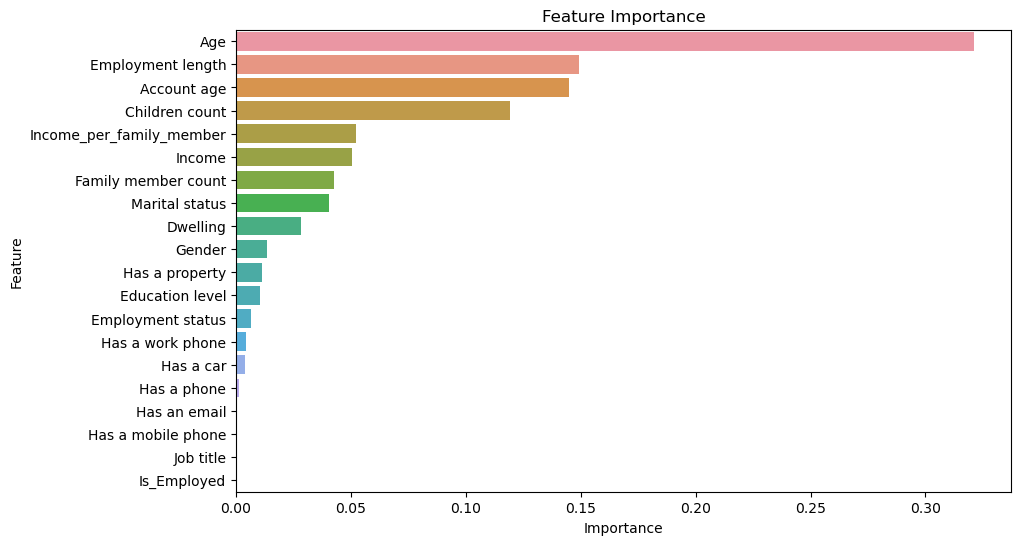

In [62]:
# Feature importance for tree-based models
if hasattr(best_model, 'feature_importances_'):
    feature_importances = pd.DataFrame({
        'Feature': X.columns,
        'Importance': best_model.feature_importances_
    }).sort_values(by='Importance', ascending=False)

    print(feature_importances)
    # Plot feature importance
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=feature_importances)
    plt.title('Feature Importance')
    plt.show()

# For logistic regression, coefficients can be used to interpret importance
elif hasattr(best_model, 'coef_'):
    feature_importances = pd.DataFrame({
        'Feature': X.columns,
        'Coefficient': best_model.coef_[0]
    }).sort_values(by='Coefficient', ascending=False)

    print(feature_importances)
    # Plot coefficients
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Coefficient', y='Feature', data=feature_importances)
    plt.title('Feature Coefficients')
    plt.show()


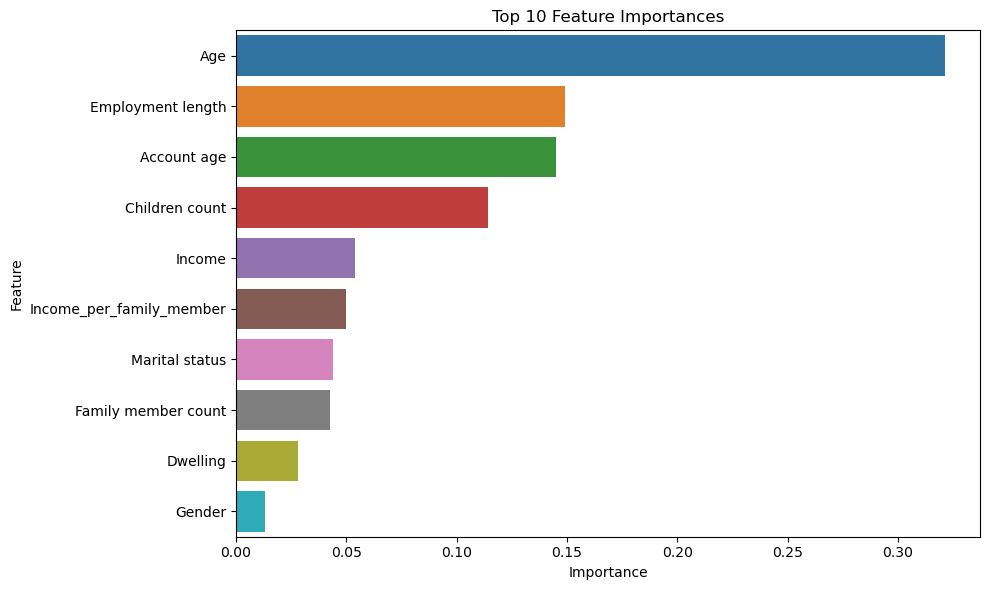

In [109]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming feature_importances is already defined as a DataFrame
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances.head(10))  # Show top 10 features
plt.title('Top 10 Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


In [63]:
# Print a summary of predictions
print(test_df[['ID', 'Predicted High Risk', 'Prediction Probability']].head(10))

# Describe the prediction probabilities
print(test_df['Prediction Probability'].describe())

        ID  Predicted High Risk  Prediction Probability
0  5091261                    0                0.005710
1  5096963                    0                0.019174
2  5087880                    0                0.006192
3  5021949                    0                0.015523
4  5105705                    0                0.039482
5  5029195                    0                0.015119
6  5029213                    0                0.010491
7  5051050                    0                0.007581
8  5061569                    0                0.033867
9  5091430                    0                0.017197
count    7292.000000
mean        0.017558
std         0.034548
min         0.000827
25%         0.007781
50%         0.012564
75%         0.019526
max         0.895458
Name: Prediction Probability, dtype: float64


In [65]:
# Exporting data to a CSV file
test_df.to_csv('C:/Users/kg317/OneDrive/Desktop.predicted_credit_card_approvals.csv', index=False)

In [66]:
# Exporting data to an Excel file
test_df.to_excel('C:/Users/kg317/OneDrive/Desktop.xlsx', index=False, sheet_name='predicted_credit_card_approvals')

report:

Introduction: Brief overview of the project and objectives.
Data Analysis: Summary of exploratory data analysis and key insights.
Model Development: Description of the models used and their performance metrics.
Feature Importance: Analysis of which features most influence the model’s predictions.
Predictions: Results from applying the model to the new test dataset.
Recommendations: Business recommendations based on the analysis.
Conclusion: Summary of findings and suggested next steps.